In [1]:
import os
import re
import pandas as pd
import tensorflow as tf
from sklearn.svm import SVR
from zipfile import ZipFile
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
if not os.path.exists('dataset'):
    with ZipFile('/content/drive/MyDrive/Colab Notebooks/Hackathons/Hackathon_2/Participants_Data_GGSH_Solution_Notebook.zip') as f:
        f.extractall('dataset')

In [4]:
def leaderboard():
    with open('leaderboard.txt') as f:
        data = f.read()
    data = re.findall('[\d]+\.([\d]+.[\d]+)', data)
    return [float(i[5:]) for i in data]

In [5]:
india_train = pd.read_csv('dataset/India_train.csv')
india_test = pd.read_csv('dataset/India_test.csv')
USA_train = pd.read_csv('dataset/USA_train.csv')
USA_test = pd.read_csv('dataset/USA_test.csv')
India_soil_rainfall_30years = pd.read_csv('dataset/India_soil_rainfall_30years.csv')
USA_Commodity_prices = pd.read_csv('dataset/USA_Commodity_prices.csv')
submission = pd.read_csv('dataset/submission.csv')

In [6]:
for i in submission.columns:
    print(i, end='')
    if i in india_test.columns:
        print(' | India')
    if i in USA_train.columns:
        print(' | USA')
    if i in India_soil_rainfall_30years.columns:
        print(' | India_soil_rainfall_30years')
    if i in USA_Commodity_prices.columns:
        print(' | USA_Commodity_prices')

Yield (Pounds/ Harvested Area) | USA
COTTON YIELD (Kg per ha) | India
Cotton_Price[Dollar/ton] | USA_Commodity_prices


## Data Cleaning

In [7]:
india_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
india_train.select_dtypes('object').columns

Index(['State Name', 'Dist Name'], dtype='object')

In [9]:
df = india_train.select_dtypes(['float', 'int'])
df.head()

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,1990,0.0,0.0,0,4.05,50.75,75.34,18.87,57.59,123.74,...,23.32,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77
1,1990,7.0,3.0,3333,NaN,54.03,94.67,12.21,143.97,115.08,...,18.24,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74
2,1990,49.0,238.0,4944,3.28,39.90,68.64,8.12,207.71,131.98,...,19.69,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95
3,1990,26.0,120.0,4964,4.14,43.94,48.83,5.39,230.23,146.55,...,NaN,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35
4,1990,996.0,289.0,2892,1.18,NaN,32.47,2.26,236.77,NaN,...,28.12,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57


In [10]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())

In [11]:
x, y = df.drop('COTTON YIELD (Kg per ha)', axis=1), df['COTTON YIELD (Kg per ha)']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr:
Score: 0.26267188359786997
MSE: 20370511.943535946
--------------------------------
dt:
Score: 0.31152981692880166
MSE: 19020690.75495751
--------------------------------
ab:
Score: 0.13770554491149123
MSE: 23823015.97548918
--------------------------------
rf:
Score: 0.5230624030686772
MSE: 13176580.139135977
--------------------------------
svr:
Score: -0.11974858511729014
MSE: 30935822.76258812
--------------------------------
Epoch 1/1000
103/103 [==============================] - 2s 11ms/step - loss: 28151546.0000 - accuracy: 0.0431
Epoch 2/1000
103/103 [==============================] - 1s 10ms/step - loss: 22229672.0000 - accuracy: 0.0055
Epoch 3/1000
103/103 [==============================] - 1s 7ms/step - loss: 21547460.0000 - accuracy: 0.0058
Epoch 4/1000
103/103 [==============================] - 1s 7ms/step - loss: 21123994.0000 - accuracy: 0.0091
Epoch 5/1000
103/103 [==============================] - 1s 7ms/step - loss: 20982428.0000 - accuracy: 0.0082
Epoch 6/1000
10

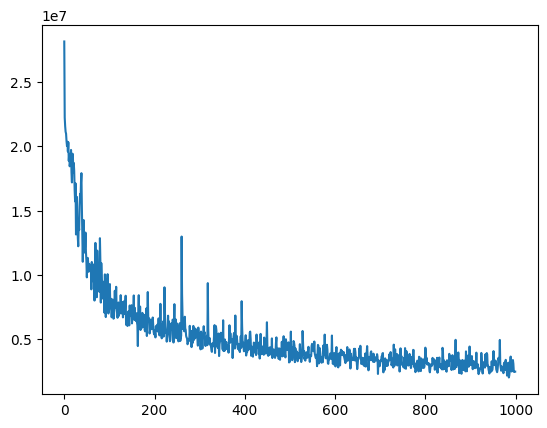

45/45 [==============================] - 0s 2ms/step
[12540696.0, 0.0]
12540694.792262707


,Name,Score,MSE
0,DL_relu,1.254070e+07,1.254069e+07
1,rf,5.230624e-01,1.317658e+07
2,dt,3.115298e-01,1.902069e+07
3,lr,2.626719e-01,2.037051e+07
4,ab,1.377055e-01,2.382302e+07
5,svr,-1.197486e-01,3.093582e+07


In [18]:
models = [['lr', LinearRegression, {}],
          ['dt', DecisionTreeRegressor, {}],
          ['ab', AdaBoostRegressor, {}],
          ['rf', RandomForestRegressor, {'n_estimators':10}],
          ['svr', SVR, {}]
        ]
for i in range(len(models)):
    model = models[i][1](**models[i][2])
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    mse = mean_squared_error(y_test, model.predict(x_test))
    models[i].extend([score, mse])
    print(f'{models[i][0]}:')
    print(f'Score: {score}')
    print(f'MSE: {mse}')
    print('--------------------------------')
models_table = pd.DataFrame(models, columns=['Name', 'Model', 'Params', 'Score', 'MSE'])\
    .sort_values('MSE')\
    .reset_index(drop=True)

model1 = Sequential([
    Dense(1000, activation='relu'),
    Dropout(0.2),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model1.fit(x_train, y_train, epochs=1000)
plt.plot(history.history['loss'])
plt.show()

score = model1.evaluate(x_test, y_test)
mse = mean_squared_error(y_test, model1.predict(x_test))
print(score)
print(mse)

models_table.loc[len(models_table)] = ['DL_relu', model1, '', score[0], mse]
# Final data
models_table = models_table\
    .sort_values('MSE')\
    .reset_index(drop=True)
models_table.drop(['Model', 'Params'], axis=1)